In [33]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

def to_stringa(punti, forma):
    return ";".join(f"{x:.3f}:{y:.3f}" for x, y in punti)+','+forma

def genera_segmento(x0, y0, theta, l, n_punti=50, rumore_std = 0.01):
    """
    Genera un segmento rettilineo con n_punti, tra due estremi calcolati a partire da un punto centrale (x0, y0),
    una lunghezza totale l e un angolo theta rispetto all'asse x. I punti sono distribuiti uniformemente lungo il segmento,
    con l'aggiunta opzionale di rumore gaussiano.

    Args:
        x0 (float): coordinata x del punto centrale del segmento
        y0 (float): coordinata y del punto centrale del segmento
        theta (float): angolo del segmento rispetto all'asse x (in radianti)
        l (float): metà lunghezza del segmento (il segmento totale sarà lungo 2*l)
        n_punti (int): numero di punti da generare lungo il segmento
        rumore_std (float): deviazione standard del rumore gaussiano da aggiungere ai punti

    Returns:
        np.ndarray: array di shape (n_punti, 2) contenente le coordinate dei punti generati
    """
    # Calcola le coordinate dei due estremi del segmento
    x1 = x0 + l * np.cos(theta)
    y1 = y0 + l * np.sin(theta)
    x2 = x0 - l * np.cos(theta)
    y2 = y0 - l * np.sin(theta)
    # Interpolazione lineare tra i due estremi per ottenere i punti
    t = np.linspace(0, 1, n_punti)
    x = x1 + t * (x2 - x1)
    y = y1 + t * (y2 - y1)
    # Aggiunta di rumore gaussiano alle coordinate
    x += np.random.normal(0, rumore_std, size=n_punti)
    y += np.random.normal(0, rumore_std, size=n_punti)
    # Restituisce un array Nx2 con i punti generati
    return np.stack([x, y], axis=1)  # shape: (n_punti, 2)

def genera_croce(x0, y0, theta, l, n_punti=50, rumore_std = 0.01):
    """
    Genera una croce composta da due segmenti ortogonali che si intersecano nel punto (x0, y0).
    Ogni segmento è centrato in (x0, y0), ha lunghezza totale 2*l e angolo theta (il secondo segmento è ruotato di 90° rispetto al primo).
    I punti sono distribuiti uniformemente lungo i segmenti, con aggiunta opzionale di rumore gaussiano.

    Args:
        x0 (float): coordinata x del centro della croce
        y0 (float): coordinata y del centro della croce
        theta (float): angolo del primo segmento rispetto all'asse x (in radianti)
        l (float): metà lunghezza di ciascun segmento (ogni segmento è lungo 2*l)
        n_punti (int): numero totale di punti da generare (divisi equamente tra i due segmenti)
        rumore_std (float): deviazione standard del rumore gaussiano da aggiungere ai punti

    Returns:
        np.ndarray: array di shape (n_punti, 2) contenente le coordinate dei punti generati
    """
    # Primo segmento (angolo theta)
    x1 = x0 + l * np.cos(theta)
    y1 = y0 + l * np.sin(theta)
    x2 = x0 - l * np.cos(theta)
    y2 = y0 - l * np.sin(theta)
    t = np.linspace(0, 1, n_punti//2)
    x = x1 + t * (x2 - x1)
    y = y1 + t * (y2 - y1)
    x += np.random.normal(0, rumore_std, size=n_punti//2)
    y += np.random.normal(0, rumore_std, size=n_punti//2)

    # Secondo segmento (angolo theta + 90°)
    x1 = x0 - l * np.sin(theta)
    y1 = y0 + l * np.cos(theta)
    x2 = x0 + l * np.sin(theta)
    y2 = y0 - l * np.cos(theta)
    t = np.linspace(0, 1, n_punti//2)
    xx = x1 + t * (x2 - x1)
    yy = y1 + t * (y2 - y1)
    xx += np.random.normal(0, rumore_std, size=n_punti//2)
    yy += np.random.normal(0, rumore_std, size=n_punti//2)

    # Unisce i punti dei due segmenti
    x = np.concatenate([x, xx])
    y = np.concatenate([y, yy])

    return np.stack([x, y], axis=1)  # shape: (n_punti, 2)



def genera_ellisse(a=1.0, b=0.5, centro=(0, 0), angolo=0.0, n_punti=100, rumore_std=0.0):
    """
    Genera punti su un'ellisse centrata in `centro`, con semiassi `a` e `b`,
    ruotata di `angolo` radianti, e opzionalmente con rumore gaussiano.

    Parametri:
    - a (float): semiasse maggiore
    - b (float): semiasse minore
    - centro (tuple): coordinate del centro (x0, y0)
    - angolo (float): rotazione in radianti (es. np.pi/4 per 45°)
    - n_punti (int): numero di punti da generare
    - rumore_std (float): deviazione standard del rumore gaussiano da aggiungere

    Ritorna:
    - array Nx2 con i punti [x, y]
    """
    
    t = np.linspace(0, 2 * np.pi, n_punti)
    x = a * np.cos(t)
    y = b * np.sin(t)

    # Rotazione
    x_rot = x * np.cos(angolo) - y * np.sin(angolo)
    y_rot = x * np.sin(angolo) + y * np.cos(angolo)

    # Traslazione
    x_finale = x_rot + centro[0]
    y_finale = y_rot + centro[1]

    # Rumore
    x_finale += np.random.normal(0, rumore_std, size=n_punti)
    y_finale += np.random.normal(0, rumore_std, size=n_punti)

    return np.stack([x_finale, y_finale], axis=1)


def genera_rettangolo(larghezza=1.0, altezza=0.5, centro=(0, 0), angolo=0.0,
            rumore_std=0.0, n_punti=100):
    """
    Genera punti distribuiti lungo i 4 lati di un rettangolo ruotato e centrato,
    in modo proporzionale alla lunghezza dei lati.

    Args:
        larghezza (float): larghezza del rettangolo
        altezza (float): altezza del rettangolo
        centro (tuple): centro (x, y)
        angolo (float): rotazione in radianti
        rumore_std (float): rumore gaussiano (std dev)
        n_punti (int): numero totale di punti da generare

    Returns:
        np.ndarray: array (n_punti, 2) con i punti lungo i lati
    """
    if n_punti < 4:
        raise ValueError("n_punti deve essere almeno 4")

    # Vertici base
    w, h = larghezza / 2, altezza / 2
    vertici = np.array([
        [-w, -h],
        [ w, -h],
        [ w,  h],
        [-w,  h]
    ])

    # Lati e lunghezze
    lati = [(vertici[(i+1) % 4] - vertici[i]) for i in range(4)]
    lunghezze = np.array([np.linalg.norm(l) for l in lati])
    proporzioni = lunghezze / lunghezze.sum()

    # Distribuzione dei punti
    n_per_lato = np.floor(proporzioni * n_punti).astype(int)
    restante = n_punti - n_per_lato.sum()
    for i in range(restante):
        n_per_lato[i % 4] += 1

    # Generazione dei punti
    punti = []
    for i, n in enumerate(n_per_lato):
        start = vertici[i]
        end = vertici[(i + 1) % 4]
        t_values = np.linspace(0, 1, n, endpoint=False)
        lato = np.outer(1 - t_values, start) + np.outer(t_values, end)
        punti.append(lato)
    punti = np.vstack(punti)

    # Rotazione, traslazione e rumore
    R = np.array([
        [np.cos(angolo), -np.sin(angolo)],
        [np.sin(angolo),  np.cos(angolo)]
    ])
    punti = punti @ R.T
    punti += np.array(centro)
    punti += np.random.normal(0, rumore_std, punti.shape)

    return punti

In [3]:
def genera_campioni(n_shapes = 100, n_punti = 50, rumore_std_bound=0):
    """
    Genera un dataset sintetico di forme geometriche (ellissi, rettangoli, segmenti e croci)
    rappresentate come sequenze di punti 2D, con etichette numeriche.

    Parametri:
        n_shapes (int): Numero di istanze da generare per ciascuna classe di forma.
        n_punti (int): Numero di punti che descrivono ciascuna forma.
        rumore_std_bound (float): Valore massimo della deviazione standard del rumore gaussiano
                                  aggiunto alle coordinate dei punti.

    Restituisce:
        X (np.ndarray): Array di shape (4*n_shapes, n_punti, 2) contenente i punti delle forme.
        y (np.ndarray): Array di shape (4*n_shapes,) contenente le etichette numeriche delle forme:
                        0=ellisse, 1=rettangolo, 2=segmento, 3=croce.

    Ogni forma viene generata con parametri casuali (dimensioni, posizione, rotazione, rumore).
    """

    X, y = [], []  # Liste per memorizzare i campioni e le etichette

    # Genera ellissi
    for _ in range(n_shapes):
        a = np.random.uniform(0.5, 3.0)                  # semiasse maggiore
        b = np.random.uniform(0.3, a)                    # semiasse minore
        centro = (np.random.uniform(-5, 5), np.random.uniform(-5, 5))  # centro casuale
        angolo = np.random.uniform(0, 2 * np.pi)         # rotazione casuale
        rumore = np.random.uniform(0.0, rumore_std_bound)  # rumore casuale
        punti = genera_ellisse(a, b, centro, angolo, n_punti=n_punti, rumore_std=rumore)  # genera punti
        X.append(punti)
        y.append(0)  # 0 = ellisse

    # Genera rettangoli
    for _ in range(n_shapes):
        punti = genera_rettangolo(
            larghezza=np.random.uniform(0.5, 3.0),       # larghezza casuale
            altezza=np.random.uniform(0.5, 2.0),         # altezza casuale
            centro=(np.random.uniform(-5, 5), np.random.uniform(-5, 5)),  # centro casuale
            angolo=np.random.uniform(0, 2*np.pi),        # rotazione casuale
            rumore_std = np.random.uniform(0.0, rumore_std_bound),        # rumore casuale
            n_punti = n_punti
        )
        X.append(punti)
        y.append(1) # 1 = rettangolo

    # Genera segmenti
    for _ in range(n_shapes):
        x0, y0 = np.random.uniform(-5, 5 ), np.random.uniform(-5, 5 )  # centro casuale
        l, theta = np.random.uniform(0, 10 ), np.random.uniform(0, np.pi )  # lunghezza e angolo casuali
        punti = genera_segmento(x0, y0, l, theta, n_punti=n_punti,
                                rumore_std = np.random.uniform(0.0, rumore_std_bound))  # genera punti
        X.append(punti)
        y.append(2)
        
    # Genera croci (due segmenti ortogonali)
    for _ in range(n_shapes):
        x0, y0 = np.random.uniform(-5, 5 ), np.random.uniform(-5, 5 )  # centro casuale
        l, theta = np.random.uniform(0, 10 ), np.random.uniform(0, np.pi )  # lunghezza e angolo casuali
        punti = genera_croce(x0, y0, l, theta, n_punti=n_punti,
                                rumore_std = np.random.uniform(0.0, rumore_std_bound))  # genera punti
        X.append(punti)
        y.append(3)  # 3 = croce
        
    return np.array(X), np.array(y)  # restituisce array di campioni e etichette

In [4]:
def get_vector_representation(X):
    """
    Converte una sequenza di array di punti 2D (shape: N, n_punti, 2)
    in una rappresentazione vettoriale piatta (shape: N, n_punti*2).

    Ogni forma viene "appiattita" in un unico vettore concatenando tutte le coordinate x e y.

    Args:
        X (np.ndarray): array di forme, ciascuna rappresentata da una sequenza di punti 2D.

    Returns:
        np.ndarray: array 2D dove ogni riga è la rappresentazione vettoriale di una forma.
    """
    return np.array([list(x.flatten()) for x in X])

In [5]:
def ottieni_features(X):
    return get_vector_representation(X)

In [6]:
labels = ['ellisse', 'rettangolo', 'segmento', 'croce']

In [7]:
import numpy as np

def esporta_dataset(filename, X, y):
    """
    Esporta un dataset di forme geometriche su file CSV, 
    dove ogni colonna è separata da virgola.

    Args:
      filename (str): Nome del file di output.
      X (np.ndarray): Array di forma (n_samples, 2*n_points) con le feature "appiattite".
      y (np.ndarray): Array di etichette numeriche (0–3).
      labels (list of str): mappa da etichetta numerica a stringa, es. ['triangolo','rettangolo',...].
    """
    with open(filename, 'w') as f:
        for x, l in zip(X, y):
            # trasforma in lista di stringhe tutti i valori numerici
            valori = [str(v) for v in x.flatten()]
            # aggiungi alla fine la label testuale
            valori.append(labels[l])
            # crea la riga CSV
            riga_csv = ','.join(valori) + '\n'
            f.write(riga_csv)
    print(f"[✔] Salvato {len(X)} righe in: {filename}")

## 1. Generazione del dataset e splitting in insiemi di training e insiemi di test

In [196]:
from sklearn.model_selection import train_test_split

X, y = genera_campioni(n_shapes=4000, n_punti=100, rumore_std_bound=0.00001)
X_flat = ottieni_features(X)
X_train, X_test, y_train, y_test = train_test_split(X_flat, y)
train_set = np.column_stack((X_train, y_train))

### Vengono generati i campioni come insieme degli esempi X e insieme delle etichette di ogni campione. X è della forma

 Vengono definite le funzioni **get_eigen(A)** che permette di calcolare la matrice centrata M e gli autovettori e autovalori della matrice di covarianza calcolata a partire da M; e la funzione **pca** che esegue la proiezione dei dati della matrice centrata M sulla base ricavata a partire dagli autovettori calcolati in precedenza, scelti in ordine di valore dei rispettivi autovalori.

In [197]:
from pylab import subplot,imshow,title,gray,NullLocator
from numpy import linalg
import numpy as np

def get_eigen(A):
    
    """
    Calcola gli autovalori e autovettori della matrice di covarianza delle righe di A.

    Parametri
    ----------
    A : ndarray
        Matrice di input (ogni riga è un campione, ogni colonna una feature).

    Restituisce
    ----------
    evals : ndarray
        Autovalori ordinati in modo decrescente.
    evects : ndarray
        Autovettori ordinati secondo gli autovalori (ogni colonna è un autovettore).
    M : ndarray
        Matrice centrata (A meno la media di ogni colonna).
    """

    # calcola la media per ogni colonna (feature)
    means = np.mean(A, axis=0)
    # sottrae la media (lungo le colonne): ogni feature ora ha media zero
    M = (A - means)
    # calcola la matrice di covarianza delle righe  di A
    c = np.cov(M, rowvar=0)
    # calcola autovalori e autovettori della matrice di covarianza
    [evals, evects] = np.linalg.eig(c)
    # ottiene gli indici degli autovalori ordinati in modo decrescente
    idx = np.argsort(evals)[::-1]
    # ordina gli autovettori (colonne di evects) secondo gli autovalori ordinati
    evects = evects[:, idx]
    # ordina gli autovalori in modo decrescente
    evals = evals[idx]
    return evals, evects, M

def pca(M, vec, numpc=0):
    
    """
    Proietta i vettori in M nello spazio generato dai primi 'numpc' autovettori di 'vec'.

    Parametri
    ----------
    M : ndarray
        Matrice dei dati centrati (ogni riga è un campione, ogni colonna una feature).
    vec : ndarray
        Matrice degli autovettori (ogni colonna è un autovettore).
    numpc : int, opzionale
        Numero di componenti principali da utilizzare per la proiezione (default: 0).

    Restituisce
    ----------
    basis : ndarray
        Matrice degli autovettori selezionati (base dello spazio ridotto).
    projections : ndarray
        Proiezione dei dati nello spazio delle componenti principali selezionate.
    """
    # Estrae i primi 'numpc' autovettori come base dello spazio ridotto
    basis = vec[:, range(numpc)]
    # Proietta i dati centrati nello spazio delle componenti principali
    projections = np.dot(M, basis)
    # Restituisce la base e le proiezioni
    return basis, projections


Applicazione PCA per riduzione della dimensionalità e comparazione con campioni originali

In [198]:

# calcolo autovalori, autovettori e restituisce la matrice centrata M per training_set e test_set
numpc = 20

autovalori_test, autovettori_test, M_test = get_eigen(X_test)
base_test, proiezioni_test = pca(M_test, autovettori_test, numpc=numpc)

transformed_test_set = proiezioni_test.dot(base_test.T)

autovalori_train, autovettori_train, M_train = get_eigen(X_train)
base_train, proiezioni_train = pca(M_train, autovettori_train, numpc=numpc)

transformed_train_set = proiezioni_train.dot(base_train.T)


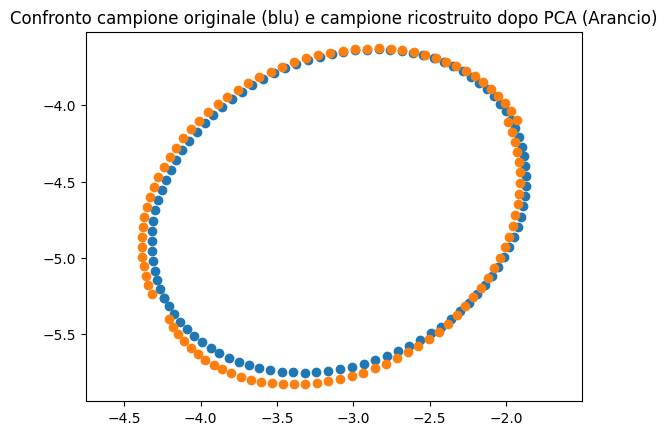

In [ ]:
# comparazione grafica tra forme ricostruite e forme originali

i = np.random.randint(low=1, high=4000)

projected = proiezioni_train.dot(base_train.T)
projected_example_train = projected[i]
transformed_example_train = projected_example_train.reshape(-1,2)

orig = X_train[i].reshape(-1,2)
x  = [orig[i][0] for i in range(orig.shape[0])]
y  = [orig[i][1] for i in range(orig.shape[0])]
ax1 = plt.subplot()
ax1.set_title("Campione originale")
ax1.axis('equal')
ax1.scatter(x,y)

x_recon  = [transformed_example_train[i][0] for i in range(transformed_example_train.shape[0])]
y_recon  = [transformed_example_train[i][1] for i in range(transformed_example_train.shape[0])]
ax2 = plt.subplot()
ax2.set_title("Confronto campione originale (blu) e campione ricostruito dopo PCA (Arancio)")
ax2.axis('equal')
ax2.scatter(x_recon,y_recon)

## Feature Selection con Random Forest

Viene utilizzato il classificatore Random Forest per andare a selezionare quelle che sono le feature con maggiore importanza, valore che si basa sulla quantità totale di information_gain associato ad ogni feature in un'istanza di Decision Tree.

In [207]:
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns

foresta = ExtraTreesClassifier(n_estimators=100, random_state=0)

foresta.fit(X_train, y_train)
importanza_features = foresta.feature_importances_

stime_features = np.array([x.feature_importances_ for x in foresta.estimators_])

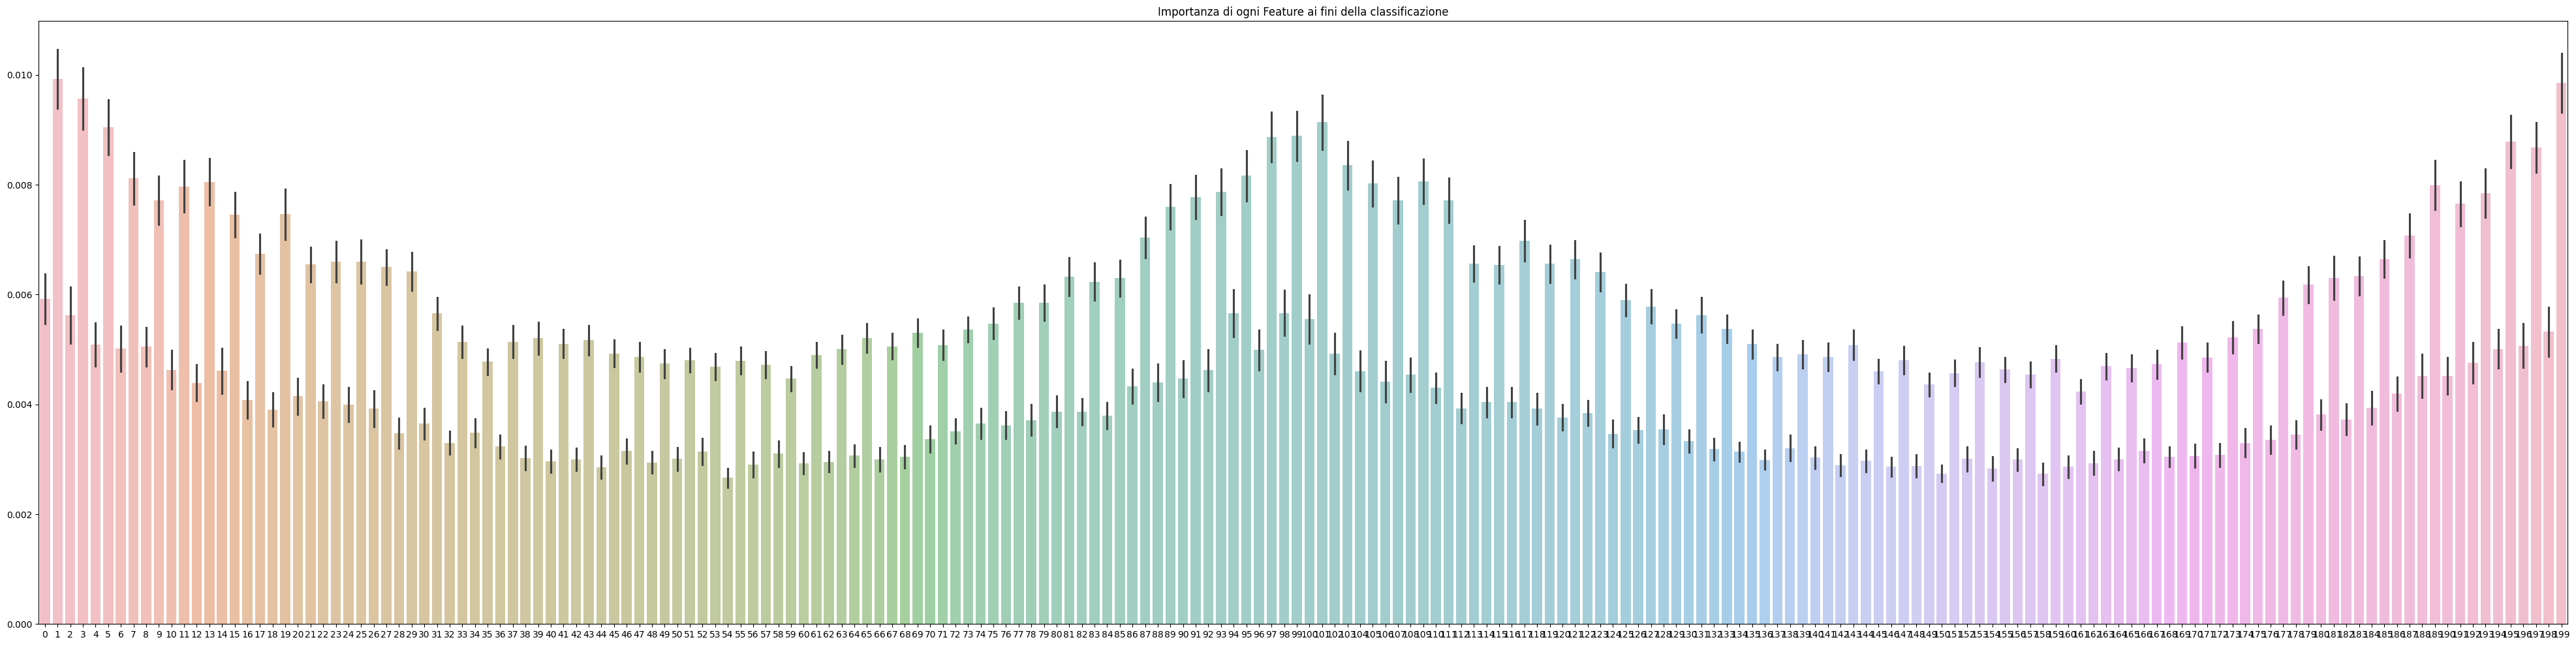

In [208]:
fig = plt.figure(figsize=(50,12))
sns.barplot(data=stime_features, errorbar="se", alpha=0.5)
plt.title('Importanza di ogni Feature ai fini della classificazione')
plt.show()

### Feature Selection con la tecnica della Mutua Informazione

In [209]:
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest

classificatore = mutual_info_classif(X_train, y_train)
dataframe_mutual = pd.DataFrame(classificatore, index=X_train[0, :] ,columns=['mi']).sort_values(by='mi', ascending=False)
dataframe_mutual

,mi
3.327730,0.039727
3.308787,0.034328
2.303695,0.034300
6.056693,0.034100
3.992692,0.034016
...,...
2.857002,0.000000
5.077201,0.000000
4.579990,0.000000
4.788388,0.000000


Feature Selection con tecniche di modelli statistici ai fini del calcolo dei "pvalue" di ogni feature.

In [210]:
KBestModel = SelectKBest(f_classif, k='all').fit(X_train, y_train)
KBestDataFrame = pd.DataFrame(np.array([KBestModel.scores_, KBestModel.pvalues_]).T, index=X_train[0, :], columns=['score', 'pval']).sort_values(by='score', ascending=False)
KBestDataFrame

,score,pval
5.372791,8.998934,0.000006
5.307487,8.751483,0.000009
5.242184,8.509414,0.000012
5.176883,8.272683,0.000017
5.111589,8.041236,0.000024
...,...,...
3.705899,0.505062,0.678777
3.444701,0.501869,0.680984
3.640600,0.499919,0.682334
3.510001,0.498165,0.683549


## 2. Implementazione di diversi classificatori al fine di classificare gli esempi

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()

logreg.fit(transformed_train_set, y_train)

out_train = logreg.predict(transformed_train_set)
print(classification_report(y_train, out_train))

out_test = logreg.predict(transformed_test_set)
print(classification_report(y_test, out_test))


              precision    recall  f1-score   support

           0       0.42      0.44      0.43      2961
           1       0.32      0.56      0.41      3017
           2       0.78      0.53      0.63      3011
           3       0.96      0.52      0.67      3011

    accuracy                           0.51     12000
   macro avg       0.62      0.51      0.53     12000
weighted avg       0.62      0.51      0.54     12000

              precision    recall  f1-score   support

           0       0.42      0.41      0.42      1039
           1       0.30      0.55      0.39       983
           2       0.78      0.51      0.62       989
           3       0.97      0.53      0.69       989

    accuracy                           0.50      4000
   macro avg       0.62      0.50      0.53      4000
weighted avg       0.62      0.50      0.53      4000



### Classificatore MultiLayerPerceptron

In [212]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# MLP con 10 unità nello strato nascosto, 300 iterazioni e (lbfgs, relu)

mlp1 = MLPClassifier(solver='lbfgs', activation='relu' ,alpha=1e-5, hidden_layer_sizes=(10), max_iter=300)
mlp1.fit(transformed_train_set, y_train)

,hidden_layer_sizes,10
,activation,'relu'
,solver,'lbfgs'
,alpha,1e-05
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,None


In [213]:
# MLP con 10 unità nello strato nascosto, 300 iterazioni e (logistic, sgd)

mlp2 = MLPClassifier(solver='sgd', activation='logistic' ,alpha=1e-5, hidden_layer_sizes=(30), max_iter=300)
mlp2.fit(transformed_train_set, y_train)

,hidden_layer_sizes,30
,activation,'logistic'
,solver,'sgd'
,alpha,1e-05
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,None


In [214]:
# MLP con 10 unità nello strato nascosto, 300 iterazioni e (adam, tanh)

mlp3 = MLPClassifier(solver='adam', activation='tanh' ,alpha=1e-5, hidden_layer_sizes=(50), max_iter=300)
mlp3.fit(transformed_train_set, y_train)

,hidden_layer_sizes,50
,activation,'tanh'
,solver,'adam'
,alpha,1e-05
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,300
,shuffle,True
,random_state,None


In [215]:
# score su mlp1

out_train_mlp1 = mlp1.predict(transformed_train_set)
mlp1.score(transformed_train_set, y_train)

out_test_mlp1 = mlp1.predict(transformed_test_set)
mlp1.score(transformed_test_set, y_test)

print(classification_report(y_train, out_train_mlp1))
print(classification_report(y_test, out_test_mlp1))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2961
           1       0.95      0.97      0.96      3017
           2       0.99      1.00      1.00      3011
           3       1.00      0.99      1.00      3011

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1039
           1       0.89      0.95      0.92       983
           2       0.98      1.00      0.99       989
           3       1.00      0.98      0.99       989

    accuracy                           0.95      4000
   macro avg       0.96      0.96      0.96      4000
weighted avg       0.96      0.95      0.95      4000



In [216]:
# score su mlp2

out_train_mlp2 = mlp2.predict(transformed_train_set)
mlp2.score(transformed_train_set, y_train)

out_test_mlp2 = mlp2.predict(transformed_test_set)
mlp2.score(transformed_test_set, y_test)

print("Prestazioni di predizione su training set")
print(classification_report(y_train, out_train_mlp2))
print("Prestazioni di predizione su test set")
print(classification_report(y_test, out_test_mlp2))

Prestazioni di predizione su training set
              precision    recall  f1-score   support

           0       0.75      0.68      0.72      2961
           1       0.69      0.78      0.74      3017
           2       0.95      0.98      0.97      3011
           3       1.00      0.93      0.96      3011

    accuracy                           0.85     12000
   macro avg       0.85      0.84      0.85     12000
weighted avg       0.85      0.85      0.85     12000

Prestazioni di predizione su test set
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1039
           1       0.66      0.79      0.72       983
           2       0.94      0.98      0.96       989
           3       0.99      0.90      0.95       989

    accuracy                           0.83      4000
   macro avg       0.84      0.83      0.83      4000
weighted avg       0.84      0.83      0.83      4000



In [217]:
# score su mlp3

out_train_mlp3 = mlp3.predict(transformed_train_set)
mlp3.score(transformed_train_set, y_train)

out_test_mlp3 = mlp3.predict(transformed_test_set)
mlp3.score(transformed_test_set, y_test)

print(classification_report(y_train, out_train_mlp3))
print(classification_report(y_test, out_test_mlp3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2961
           1       1.00      1.00      1.00      3017
           2       1.00      0.99      0.99      3011
           3       0.99      1.00      0.99      3011

    accuracy                           0.99     12000
   macro avg       0.99      0.99      0.99     12000
weighted avg       0.99      0.99      0.99     12000

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1039
           1       0.99      0.99      0.99       983
           2       0.99      0.98      0.99       989
           3       0.98      0.99      0.99       989

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



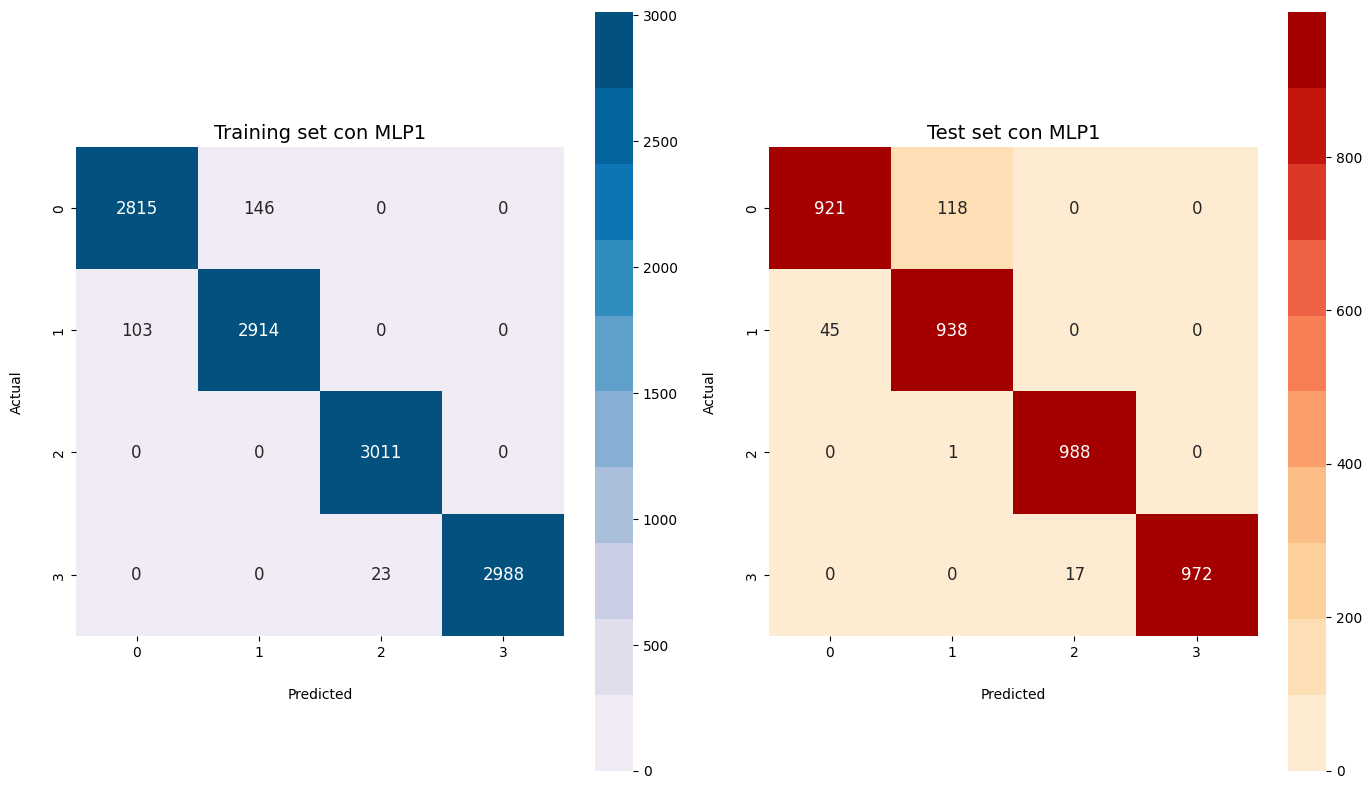

In [218]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
hm = sns.heatmap(confusion_matrix(y_train, out_train_mlp1),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set con MLP1', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(confusion_matrix(y_test, out_test_mlp1),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set con MLP1', fontsize=14)
plt.tight_layout()
plt.show()

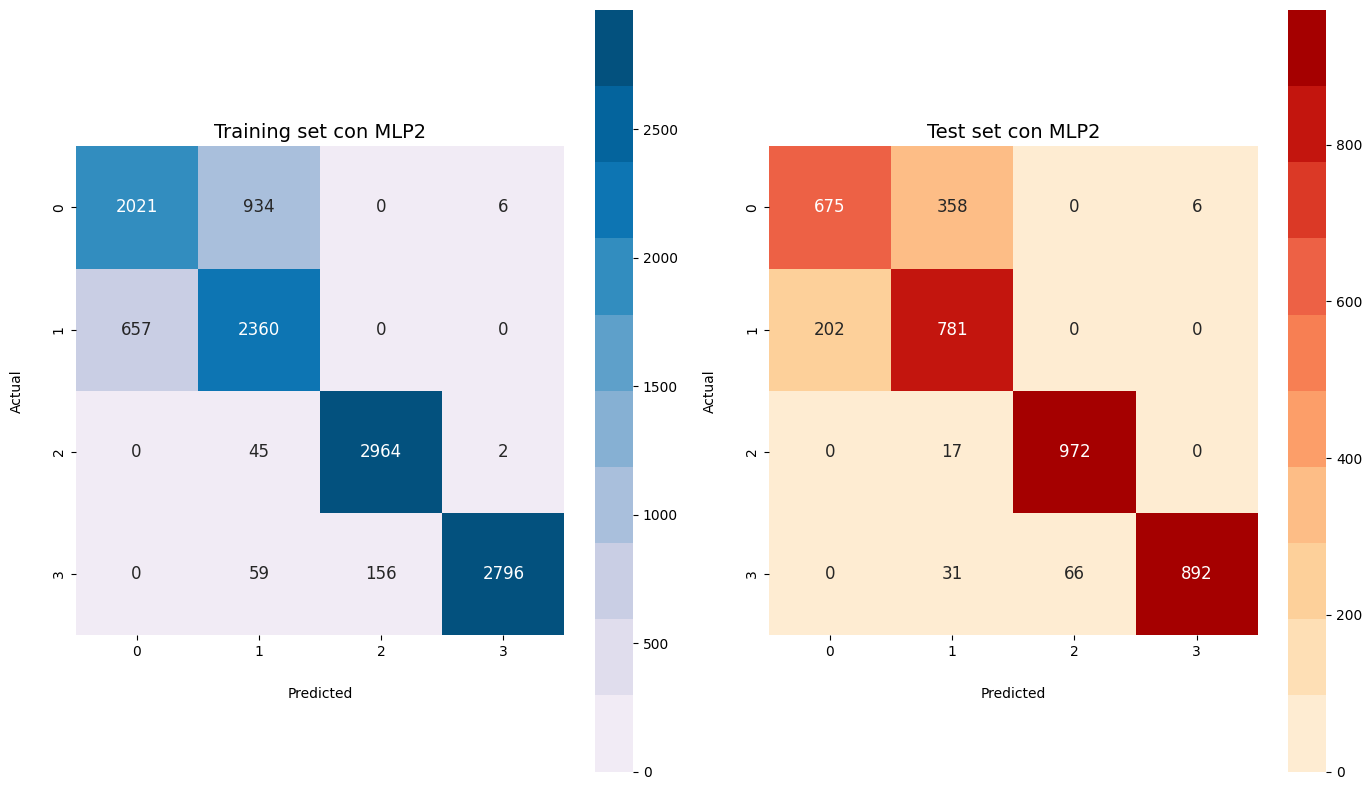

In [219]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
hm = sns.heatmap(confusion_matrix(y_train, out_train_mlp2),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set con MLP2', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(confusion_matrix(y_test, out_test_mlp2),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set con MLP2', fontsize=14)
plt.tight_layout()
plt.show()

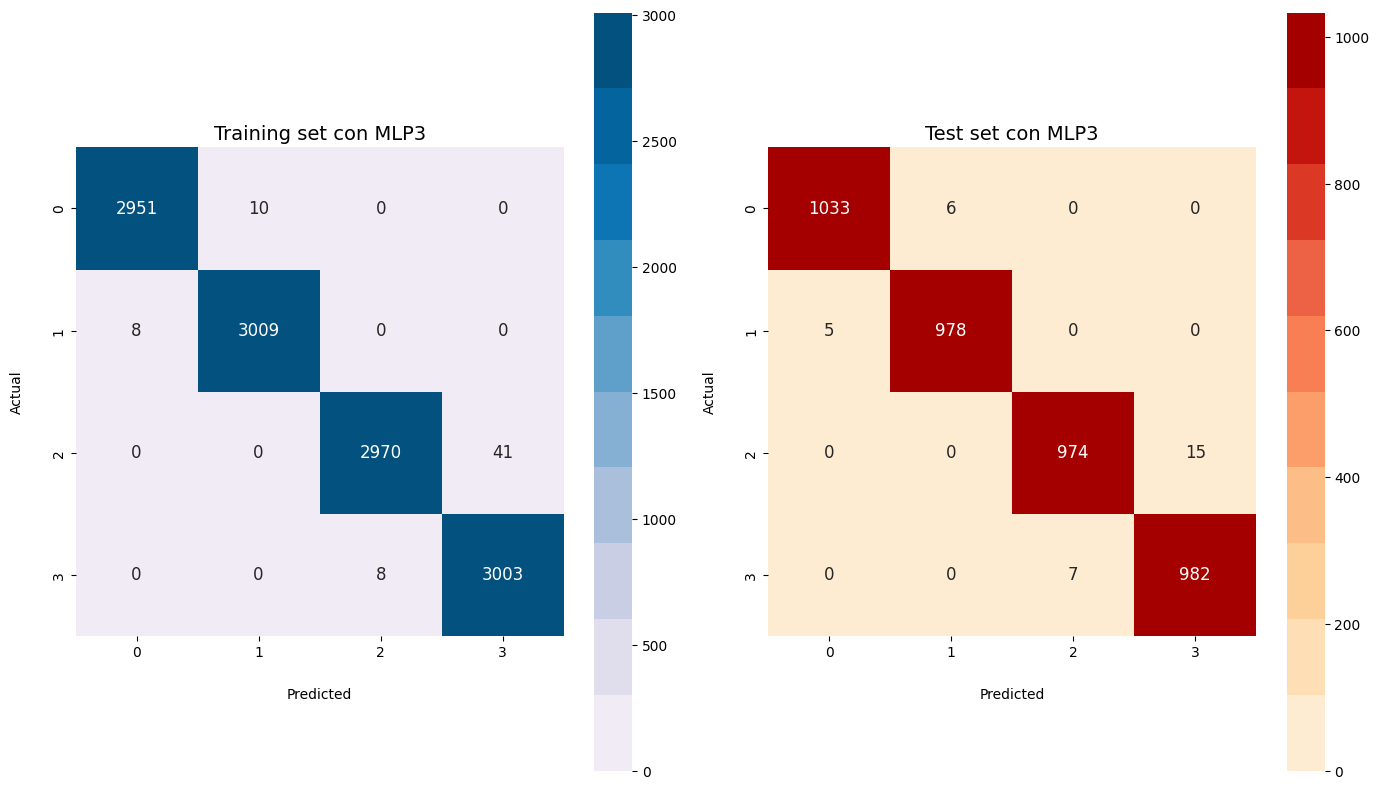

In [220]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
hm = sns.heatmap(confusion_matrix(y_train, out_train_mlp3),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("PuBu", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Training set con MLP3', fontsize=14)
plt.subplot(1,2,2)
hm = sns.heatmap(confusion_matrix(y_test, out_test_mlp3),cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 12},cmap = sns.color_palette("OrRd", 10))
plt.xlabel("Predicted", fontsize=10, labelpad=20)
plt.ylabel("Actual", fontsize=10, labelpad=20)
plt.title('Test set con MLP3', fontsize=14)
plt.tight_layout()
plt.show()

In [221]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf1 = LinearDiscriminantAnalysis(store_covariance=True)
clf1 = clf.fit(transformed_train_set, y_train)

In [222]:
print("Accuracy: {0:5.3f}".format(cross_val_score(clf1, transformed_train_set, y_test, cv=5, scoring='accuracy').mean()))

ValueError: Found input variables with inconsistent numbers of samples: [12000, 4000]

TODO:
- Implementazione di pipeline per ogni strategia di feature selection o feature extraction con precedente valutazione se fare o meno la standardizzazione con però classificazione che verrà fatta dopo;
- Fare altri classificatori STUDIATI BENE PER PIACERE
- Risolvere sta storia del validation set, eventualmente usare soltanto lo scoring